In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import sys 
sys.path.append('..')
import myd2l

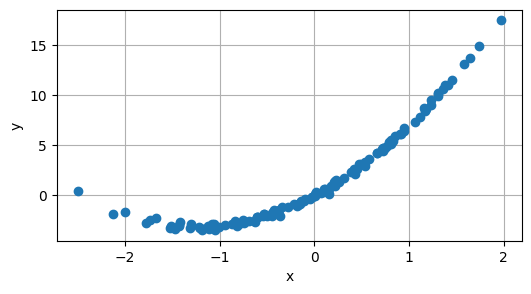

In [17]:
true_w1, true_w2 = 5, 2
x_data = torch.randn((128), dtype=torch.float32)
y_data = true_w1 * x_data + true_w2 * x_data**2 + torch.randn((128)) * 0.2

ax = myd2l.build_ax('x', 'y')
ax.plot(x_data, y_data, 'o')

In [18]:
dataset = Data.TensorDataset(x_data, y_data)
data_iter = Data.DataLoader(dataset, batch_size=8, shuffle=True)

In [19]:
# SGD

def evaluate_loss(data_iter, w1, w2, loss):
    sum_loss = 0
    for x, y in data_iter:
        with torch.no_grad():
            sum_loss += loss(w1 * x + w2 * x**2, y).item()
    
    return sum_loss / len(data_iter)

def train_sgd(num_epochs, data_iter, lr, w1, w2):
    w1 = torch.tensor([w1], dtype=torch.float32, requires_grad=True)
    w2 = torch.tensor([w2], dtype=torch.float32, requires_grad=True)
    loss = nn.MSELoss(reduction='mean')

    losses = []
    for epoch in range(num_epochs):
        for x, y in data_iter:
            y_hat = w1 * x + w2 * x**2
            l = loss(y_hat, y)
            l.backward()
            grad1, grad2 = w1.grad, w2.grad
            with torch.no_grad():
                w1 -= lr / x.shape[0] * grad1
                w2 -= lr / x.shape[0] * grad2 
            w1.grad.zero_()
            w2.grad.zero_()
            
        losses.append(evaluate_loss(data_iter, w1, w2, loss))
    
    print(f'w1 {w1.item():.5f}, w2 {w2.item():.5f}')
    ax = myd2l.build_ax('epoch', 'loss')
    ax.plot(range(1, num_epochs + 1), losses)
        

w1 4.84348, w2 1.96706


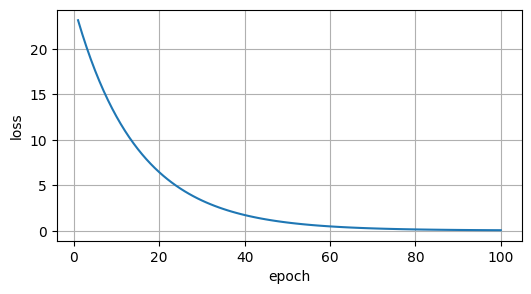

In [20]:
train_sgd(100, data_iter, 0.01, 0, 0)